# Energy
## Current


In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt

In [16]:
pace_df = pd.read_csv('.\\PACE.csv')
# parse the Local date column
pace_df['Local date'] = pd.to_datetime(pace_df['Local date'], format='%d%b%Y')

# keep only 2022‑onwards
# keep only 2022‑onwards and chop off the very latest days
# (here we drop the last two days as an example – adjust `days=` as needed)
cutoff = pd.Timestamp.today().normalize() - pd.Timedelta(days=3)
pace_recent = pace_df[
    (pace_df['Local date'].dt.year >= 2020) &
    (pace_df['Local date'] < cutoff)
]

# inspect result
pace_recent.head()

C:\Users\Cameron\AppData\Local\Temp\ipykernel_13016\851765407.py:1: DtypeWarning: Columns (0: Imputed demand, 1: Imputed net generation, 2: NG: COL, 3: NG: NG, 4: NG: WAT, 5: NG: SUN, 6: NG: WND, 7: NG: OTH, 8: Imputed COL Gen, 9: Imputed NG Gen, 10: Imputed WND Gen, 11: Imputed OTH Gen, 12: Adjusted COL Gen, 13: Adjusted NG Gen, 14: Adjusted WAT Gen, 15: Adjusted SUN Gen, 16: Adjusted WND Gen, 17: Adjusted OTH Gen, 18: LDWP, 19: PACW, 20: CO2 Emissions: COL, 21: CO2 Emissions: NG, 22: CO2 Emissions Generated, 23: CO2 Emissions Imported, 24: CO2 Emissions Exported, 25: CO2 Emissions Consumed, 26: Positive Generation, 27: Consumed Electricity) have mixed types. Specify dtype option on import or set low_memory=False.
  pace_df = pd.read_csv('.\\PACE.csv')


,BA,UTC time,Local date,Hour,Local time,Time zone,Generation only?,Demand forecast,Demand,Net generation,...,CO2 Emissions: OIL,CO2 Emissions: Other,CO2 Emissions Generated,CO2 Emissions Imported,CO2 Emissions Exported,CO2 Emissions Consumed,Positive Generation,Consumed Electricity,CO2 Emissions Intensity for Generated Electricity,CO2 Emissions Intensity for Consumed Electricity
39481,PACE,01Jan2020 8:00:00,2020-01-01,1,01Jan2020 1:00:00,Mountain,N,"5,491","5,461","5,422",...,NaN,10.0,"3,491",745,893,"3,344","5,422","5,461",1.42,1.35
39482,PACE,01Jan2020 9:00:00,2020-01-01,2,01Jan2020 2:00:00,Mountain,N,"5,392","5,321","5,356",...,NaN,9.0,"3,454",659,846,"3,267","5,356","5,321",1.42,1.35
39483,PACE,01Jan2020 10:00:00,2020-01-01,3,01Jan2020 3:00:00,Mountain,N,"5,353","5,287","5,305",...,NaN,9.0,"3,425",708,855,"3,278","5,305","5,287",1.42,1.37
39484,PACE,01Jan2020 11:00:00,2020-01-01,4,01Jan2020 4:00:00,Mountain,N,"5,306","5,271","5,204",...,NaN,9.0,"3,307",682,755,"3,235","5,204","5,271",1.40,1.35
39485,PACE,01Jan2020 12:00:00,2020-01-01,5,01Jan2020 5:00:00,Mountain,N,"5,297","5,321","5,198",...,NaN,9.0,"3,408",683,735,"3,355","5,198","5,321",1.45,1.39


In [12]:
pace_recent.tail()

,BA,UTC time,Local date,Hour,Local time,Time zone,Generation only?,Demand forecast,Demand,Net generation,...,CO2 Emissions: OIL,CO2 Emissions: Other,CO2 Emissions Generated,CO2 Emissions Imported,CO2 Emissions Exported,CO2 Emissions Consumed,Positive Generation,Consumed Electricity,CO2 Emissions Intensity for Generated Electricity,CO2 Emissions Intensity for Consumed Electricity
93404,PACE,25Feb2026 3:00:00,2026-02-24,20,24Feb2026 20:00:00,Mountain,N,"6,608","6,280","6,852",...,NaN,12.0,"3,026",163.0,450,"2,739","6,852","6,280",0.97,0.96
93405,PACE,25Feb2026 4:00:00,2026-02-24,21,24Feb2026 21:00:00,Mountain,N,"6,527","6,184","6,942",...,NaN,13.0,"3,050",123.0,484,"2,689","6,942","6,184",0.97,0.96
93406,PACE,25Feb2026 5:00:00,2026-02-24,22,24Feb2026 22:00:00,Mountain,N,"6,372","5,997","6,932",...,NaN,12.0,"3,231",105.0,560,"2,775","6,932","5,997",1.03,1.02
93407,PACE,25Feb2026 6:00:00,2026-02-24,23,24Feb2026 23:00:00,Mountain,N,"6,138","5,917","6,751",...,NaN,12.0,"3,115",65.0,485,"2,695","6,752","5,918",1.02,1.00
93408,PACE,25Feb2026 7:00:00,2026-02-24,24,25Feb2026 0:00:00,Mountain,N,"5,915","5,694","6,624",...,NaN,12.0,"3,019",80.0,513,"2,586","6,624","5,694",1.00,1.00


# Energy Consumption

C:\Users\camer\AppData\Local\Temp\ipykernel_37756\1986178480.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pace_recent['Adjusted demand'] = pd.to_numeric(clean_demand, errors='coerce')


        Date  Adjusted demand
0 2022-01-01           133372
1 2022-01-02           132688
2 2022-01-03           135893
3 2022-01-04           137035
4 2022-01-05           138316


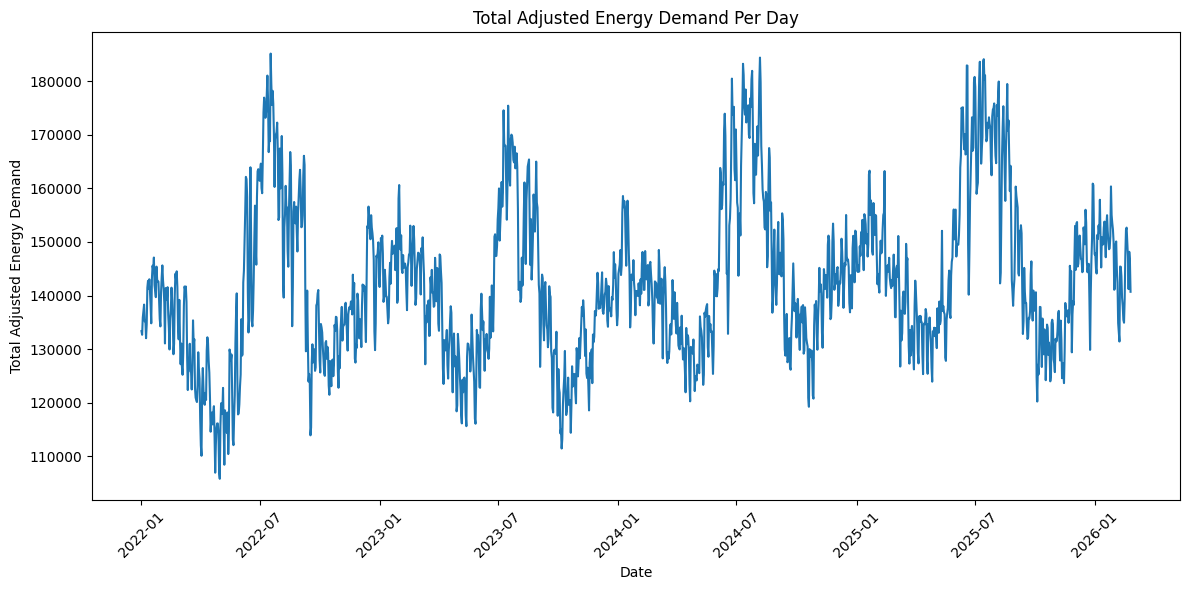

In [3]:
clean_demand = (
    pace_recent['Adjusted demand']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
    .replace(['', 'nan', 'None', 'null'], pd.NA)
)

pace_recent['Adjusted demand'] = pd.to_numeric(clean_demand, errors='coerce')

daily_energy = (
    pace_recent
    .groupby('Local date', as_index=False)['Adjusted demand']
    .sum()
)

daily_energy.columns = ['Date', 'Adjusted demand']
daily_energy['Date'] = pd.to_datetime(daily_energy['Date'])
daily_energy['Adjusted demand'] = daily_energy['Adjusted demand'].astype(int)

print(daily_energy.head())

plt.figure(figsize=(12, 6))
plt.plot(daily_energy['Date'], daily_energy['Adjusted demand'])
plt.title('Total Adjusted Energy Demand Per Day')
plt.xlabel('Date')
plt.ylabel('Total Adjusted Energy Demand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\camer\AppData\Local\Temp\ipykernel_37756\2201505633.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pace_recent[c] = pd.to_numeric(
C:\Users\camer\AppData\Local\Temp\ipykernel_37756\2201505633.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pace_recent[c] = pd.to_numeric(
C:\Users\camer\AppData\Local\Temp\ipykernel_37756\2201505633.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

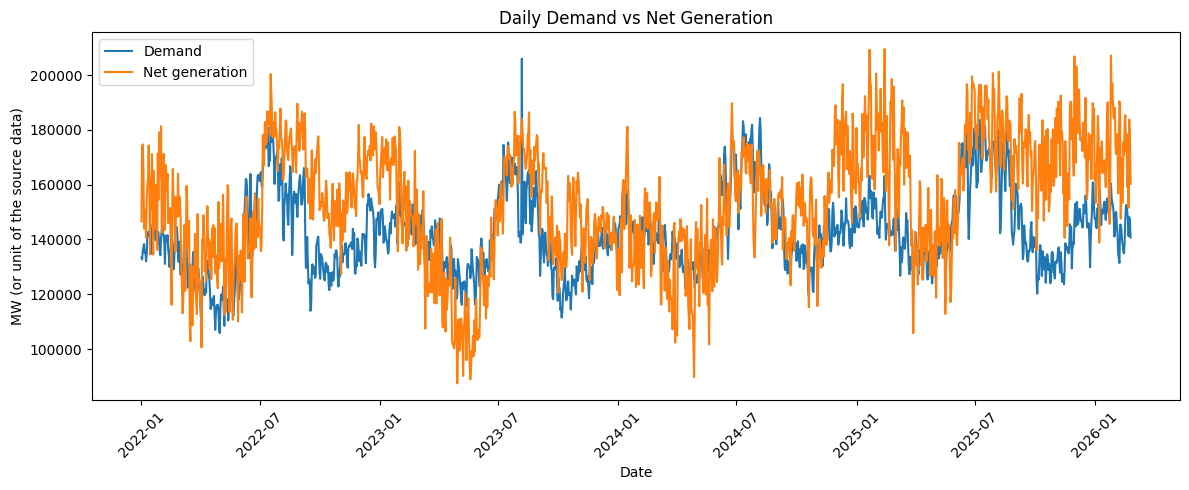

<Figure size 1200x500 with 0 Axes>

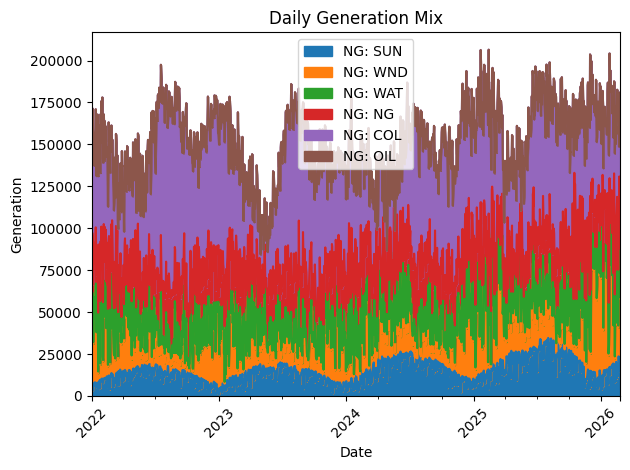

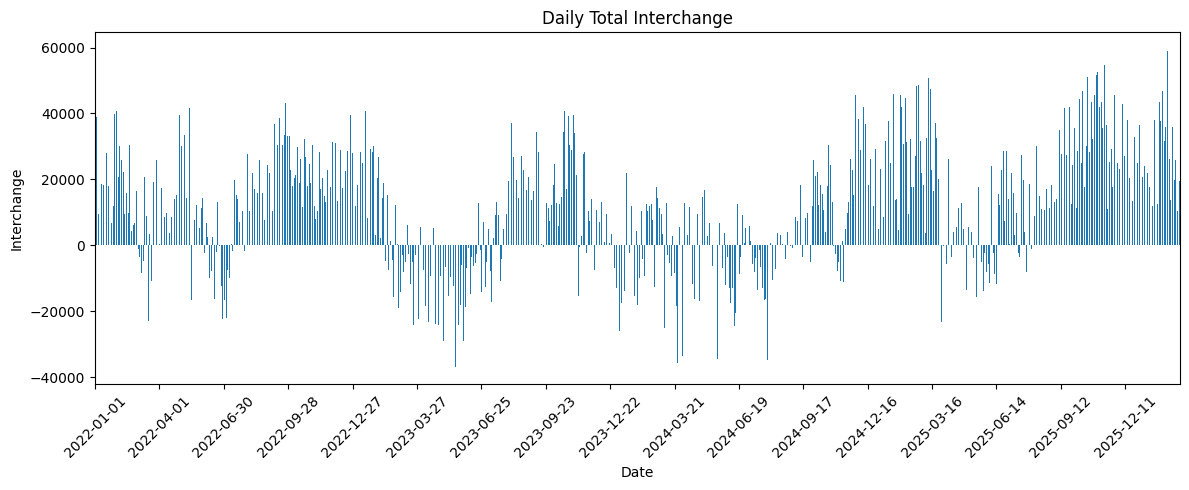

In [4]:
# make the relevant columns numeric (they are objects with commas etc.)
num_cols = [
    'Demand', 'Net generation', 'Total interchange',
    'NG: SUN', 'NG: WND', 'NG: WAT', 'NG: NG',
    'NG: COL', 'NG: OIL'
]
for c in num_cols:
    pace_recent[c] = pd.to_numeric(
        pace_recent[c].astype(str).str.replace(',', '', regex=False),
        errors='coerce'
    )

# aggregate to daily totals so the plots are easier to read
daily_all = (
    pace_recent
    .set_index('Local date')[num_cols]
    .resample('D')
    .sum()
)

# --- line chart: demand vs. net generation ---
plt.figure(figsize=(12, 5))
plt.plot(daily_all.index, daily_all['Demand'], label='Demand')
plt.plot(daily_all.index, daily_all['Net generation'], label='Net generation')
plt.title('Daily Demand vs Net Generation')
plt.xlabel('Date')
plt.ylabel('MW (or unit of the source data)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- stacked area chart: generation mix ---
mix_cols = ['NG: SUN', 'NG: WND', 'NG: WAT', 'NG: NG', 'NG: COL', 'NG: OIL']
plt.figure(figsize=(12, 5))
daily_all[mix_cols].plot.area()
plt.title('Daily Generation Mix')
plt.xlabel('Date')
plt.ylabel('Generation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- interchange chart (bar, positive = import, negative = export) ---
plt.figure(figsize=(12, 5))
daily_all['Total interchange'].plot(kind='bar')
plt.title('Daily Total Interchange')
plt.xlabel('Date')
plt.ylabel('Interchange')
# Show only every 90 days (approximately quarterly)
tick_positions = range(0, len(daily_all), 90)
tick_labels = [daily_all.index[i].strftime('%Y-%m-%d') for i in tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45)
plt.tight_layout()
plt.show()

In [6]:

# force Plotly to open in browser
pio.renderers.default = "browser"

clean_demand = (
    pace_recent['Adjusted demand']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
    .replace(['', 'nan', 'None', 'null'], pd.NA)
)

pace_recent['Adjusted demand'] = pd.to_numeric(clean_demand, errors='coerce')

daily_energy = (
    pace_recent
    .groupby('Local date', as_index=False)['Adjusted demand']
    .sum()
)

daily_energy.columns = ['Date', 'Adjusted demand']
daily_energy['Date'] = pd.to_datetime(daily_energy['Date'])
daily_energy['Adjusted demand'] = daily_energy['Adjusted demand'].astype(int)

fig = px.line(
    daily_energy,
    x='Date',
    y='Adjusted demand',
    title='Total Adjusted Energy Demand Per Day',
    markers=True
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Total Energy Demand',
    hovermode='x unified'
)

fig.update_yaxes(tickformat=',')
fig.update_traces(
    hovertemplate='Date=%{x|%Y-%m-%d}<br>Demand=%{y:,}<extra></extra>'
)

fig.show()

C:\Users\camer\AppData\Local\Temp\ipykernel_37756\3502942052.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Predicting future Total
### This is what the current data looks like but what could it be in the next few years?
### Looking at using SARIMA Model so 

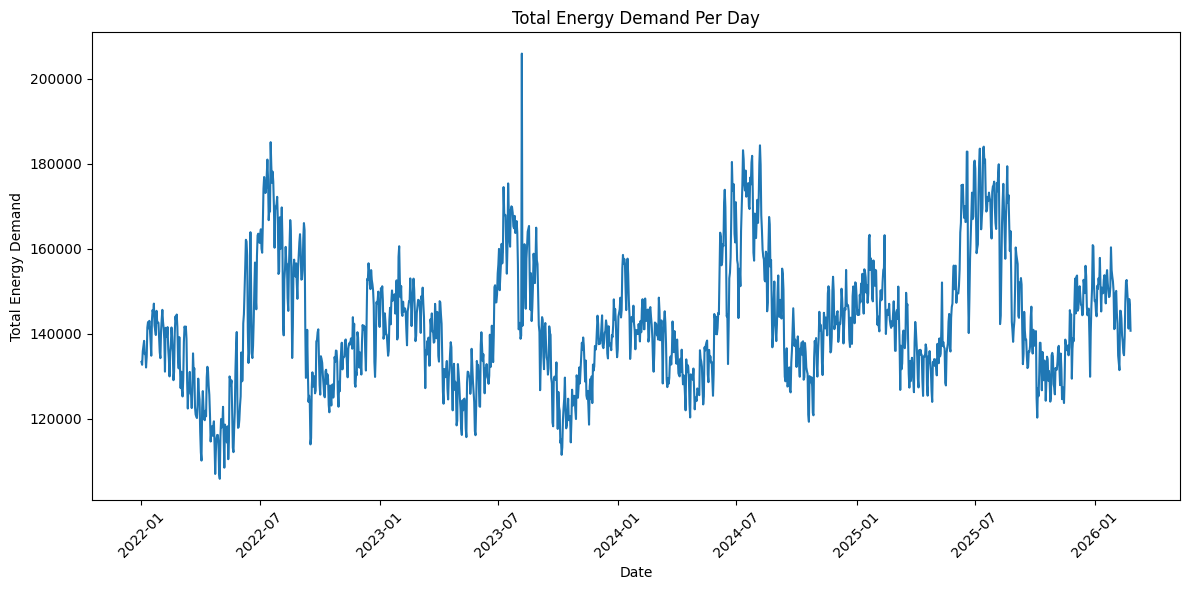

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd


def sarima_forecast_demand(df, steps=14):
    if "Local date" not in df.columns:
        raise ValueError("Column 'Local date' not found")

    if "Demand" not in df.columns:
        raise ValueError("Column 'Demand' not found")

    model_df = df[["Local date", "Demand"]].copy()
    print("initial shape:", model_df.shape)

    model_df["Local date"] = pd.to_datetime(model_df["Local date"], errors="coerce")
    model_df["Demand"] = pd.to_numeric(model_df["Demand"], errors="coerce")

    print("missing Local date:", model_df["Local date"].isna().sum())
    print("missing Demand:", model_df["Demand"].isna().sum())

    model_df = model_df.dropna(subset=["Local date", "Demand"])
    print("after dropna:", model_df.shape)

    model_df = model_df.sort_values("Local date")

    model_df = model_df.groupby("Local date", as_index=False)["Demand"].mean()
    print("after groupby:", model_df.shape)

    model_df = model_df.set_index("Local date")
    print("final length:", len(model_df))

    if len(model_df) < 30:
        raise ValueError("Not enough data to fit SARIMA")

    model = SARIMAX(
        model_df["Demand"],
        order=(1, 1, 1),
        seasonal_order=(1, 1, 1, 7),
        enforce_stationarity=False,
        enforce_invertibility=False
    )

    results = model.fit(disp=False)

    forecast_result = results.get_forecast(steps=steps)
    forecast_mean = forecast_result.predicted_mean
    conf_int = forecast_result.conf_int()

    forecast_dates = pd.date_range(
        start=model_df.index[-1] + pd.Timedelta(days=1),
        periods=steps,
        freq="D"
    )

    values = []
    for i in range(steps):
        values.append({
            "date": str(forecast_dates[i].date()),
            "predicted_demand": float(forecast_mean.iloc[i]),
            "lower_confidence": float(conf_int.iloc[i, 0]),
            "upper_confidence": float(conf_int.iloc[i, 1])
        })

    return values

ValueError: Not enough data to fit SARIMA

In [20]:
print(pace_recent["Demand"].head(20))
print(pace_recent["Demand"].dtype)

39481    5,461
39482    5,321
39483    5,287
39484    5,271
39485    5,321
39486    5,411
39487    5,442
39488    5,456
39489    5,574
39490    5,698
39491    5,829
39492    5,962
39493    5,942
39494    5,889
39495    5,846
39496    5,872
39497    6,013
39498    6,273
39499    6,209
39500    6,164
Name: Demand, dtype: str
str
